#  Challenge
Do a little scraping or API-calling of your own. Pick a new website and see what you can get out of it. Expect that you'll run into bugs and blind alleys, and rely on your mentor to help you get through.

Formally, your goal is to write a scraper that will:

1) Return specific pieces of information (rather than just downloading a whole page) 2) Iterate over multiple pages/queries 3) Save the data to your computer

Once you have your data, compute some statistical summaries and/or visualizations that give you some new insights into your scraping topic of interest. Write up a report from scraping code to summary and share it with your mentor.

# Aim

Get some baseball data from here
https://www.baseball-reference.com/teams/CHC/2018.shtml

I have no idea of baseball, but let's see if I can find out a succesful player.I guess, who ever has the scores the most home runs must be good.

In [1]:
#https://www.baseball-reference.com/teams/BOS/2018.shtml
#https://www.baseball-reference.com/teams/NYY/2018.shtml
import scrapy
from scrapy.crawler import CrawlerProcess

import os
os.remove("baseball.json")

class BSSpider(scrapy.Spider):
    name = "baseballspy"

    start_urls = [
            'https://www.baseball-reference.com/teams/BOS/2018.shtml',
            'https://www.baseball-reference.com/teams/NYY/2018.shtml',
            'https://www.baseball-reference.com/teams/TBR/2018.shtml',
            'https://www.baseball-reference.com/teams/TOR/2018.shtml',
            'https://www.baseball-reference.com/teams/BAL/2018.shtml'
        
        
        ]
        
            
    def parse(self, response):
        #table= response.xpath('//*[@id="team_batting"]').get()
        team=response.xpath('//*[@id="meta"]/div[2]/h1/span[2]/text()').get()
        table=response.xpath('//*[@id="team_batting"]')
        rows=table.xpath('tbody/tr')
        for r in range(len(rows)):
            
            yield { #Copy Xpath: //*[@id="team_batting"]/tbody/tr[1]/th
                #'Name': rows[r].xpath('td[@data-stat="age"]/text()').get(),
                'Team': team,
                'Name': rows[r].xpath('td[@data-stat="player"]/a/text()').get(),
                'Age': rows[r].xpath('td[@data-stat="age"]/text()').get(),
                'Games': rows[r].xpath('td[@data-stat="G"]/text()').get(),
                'PA': rows[r].xpath('td[@data-stat="PA"]/text()').get(),
                'HR': rows[r].xpath('td[@data-stat="HR"]/text()').get(),
                }
    
# Tell the script how to run the crawler by passing in settings.
process = CrawlerProcess({
    'FEED_FORMAT': 'json',         # Store data in JSON format.
    'FEED_URI': 'baseball.json',  # Name our storage file.
    'LOG_ENABLED': False           # Turn off logging for now.
})

# Start the crawler with our spider.
process.crawl(BSSpider)
process.start()
print('Success!')

Success!


In [2]:
import pandas as pd

# Checking whether we got data from all 9 pages
BSdf=pd.read_json('baseball.json', orient='records')
print(BSdf.shape)
print(BSdf.head())

(275, 6)
    Age  Games    HR             Name     PA            Team
0  29.0   89.0   5.0       Sandy Leon  288.0  Boston Red Sox
1  32.0  124.0  15.0   Mitch Moreland  459.0  Boston Red Sox
2  31.0  127.0  10.0    Eduardo Nunez  502.0  Boston Red Sox
3  25.0  136.0  23.0  Xander Bogaerts  580.0  Boston Red Sox
4  21.0  121.0  21.0    Rafael Devers  490.0  Boston Red Sox


## Most games

In [3]:
BSdf.sort_values('Games',ascending=False).head()

,Age,Games,HR,Name,PA,Team
96,28.0,158.0,38.0,Giancarlo Stanton,705.0,New York Yankees
19,26.0,156.0,24.0,Trey Mancini,636.0,Baltimore Orioles
8,30.0,150.0,43.0,J.D. Martinez,649.0,Boston Red Sox
68,23.0,149.0,27.0,Miguel Andujar,606.0,New York Yankees
5,23.0,148.0,16.0,Andrew Benintendi,661.0,Boston Red Sox


## Highest HR rate (per game)

In [4]:
BSdf['HR/Games']=BSdf.HR/BSdf.Games
BSdf.sort_values('HR/Games',ascending=False).head()

,Age,Games,HR,Name,PA,Team,HR/Games
100,27.0,39.0,14.0,Luke Voit,148.0,New York Yankees,0.358974
8,30.0,150.0,43.0,J.D. Martinez,649.0,Boston Red Sox,0.286667
17,25.0,96.0,24.0,Manny Machado,413.0,Baltimore Orioles,0.250000
71,26.0,112.0,27.0,Aaron Judge,498.0,New York Yankees,0.241071
96,28.0,158.0,38.0,Giancarlo Stanton,705.0,New York Yankees,0.240506


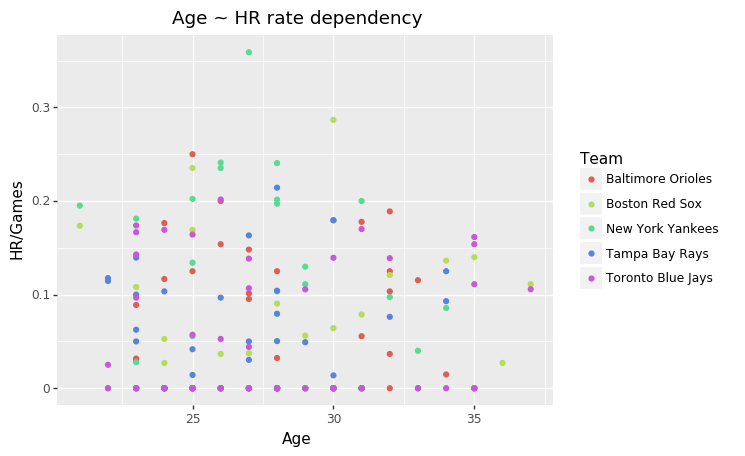

<ggplot: (177137073181)>

In [5]:
# Plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from plotnine import *

(ggplot(BSdf)
 + geom_point(aes(x='Age', y='HR/Games', color='Team'))
 + labs(title='Age ~ HR rate dependency')
)

## HR rate per plate appearance

In [6]:
BSdf['HR/PA']=BSdf.HR/BSdf.PA
BSdf.sort_values('HR/PA',ascending=False).head()

,Age,Games,HR,Name,PA,Team,HR/Games,HR/PA
100,27.0,39.0,14.0,Luke Voit,148.0,New York Yankees,0.358974,0.094595
8,30.0,150.0,43.0,J.D. Martinez,649.0,Boston Red Sox,0.286667,0.066256
121,24.0,17.0,3.0,DJ Stewart,47.0,Baltimore Orioles,0.176471,0.063830
79,31.0,45.0,8.0,Pedro Alvarez,127.0,Baltimore Orioles,0.177778,0.062992
159,23.0,14.0,2.0,Reese McGuire,33.0,Toronto Blue Jays,0.142857,0.060606


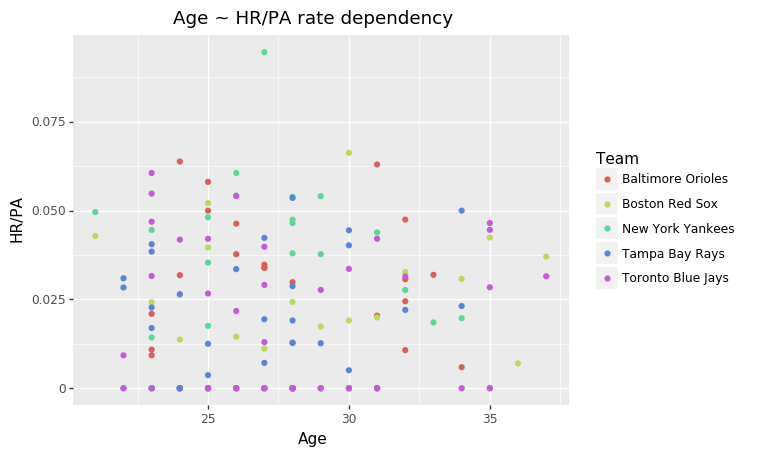

<ggplot: (177151618582)>

In [7]:
(ggplot(BSdf)
 + geom_point(aes(x='Age', y='HR/PA', color='Team'))
 + labs(title='Age ~ HR/PA rate dependency')
)

# Result
This Luke